## Case Study - Telecom Churn

### Business Problem 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### Business Objective
  -  For many incumbent operators, retaining high profitable customers is the number one business goal.
  -  Telecom companies need to predict which customers are at high risk of churn to reduce customer churn .

### Approach

####   Undersatnd the definition of churn :

  - Payment Model - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).
  - In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.
  - However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).
  - Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

####   Analysis will use usage-based definition , Indian and Southeast Asian market.
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
  - A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

#### High-value Churn
  - In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
  - In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.
 

### Import modules

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os


import matplotlib.pyplot as plt
import seaborn as sns


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [2]:
# Importing all datasets
churn_data = pd.read_csv("telecom_churn_data.csv")


In [3]:
print(churn_data.shape)
#print(churn_data.head())

(99999, 226)


#### Display the columns in chunk using info

In [4]:

churn_data1= churn_data[churn_data.columns[0:100]]
churn_data1.info()
churn_data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 100 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mobile_number         99999 non-null  int64  
 1   circle_id             99999 non-null  int64  
 2   loc_og_t2o_mou        98981 non-null  float64
 3   std_og_t2o_mou        98981 non-null  float64
 4   loc_ic_t2o_mou        98981 non-null  float64
 5   last_date_of_month_6  99999 non-null  object 
 6   last_date_of_month_7  99398 non-null  object 
 7   last_date_of_month_8  98899 non-null  object 
 8   last_date_of_month_9  98340 non-null  object 
 9   arpu_6                99999 non-null  float64
 10  arpu_7                99999 non-null  float64
 11  arpu_8                99999 non-null  float64
 12  arpu_9                99999 non-null  float64
 13  onnet_mou_6           96062 non-null  float64
 14  onnet_mou_7           96140 non-null  float64
 15  onnet_mou_8       

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,64.51,20.28,52.86,57.43,27.09,19.84,65.59,233.48,111.59,48.18
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,109.54,104.13,48.24,1.50,0.00,0.00,0.00,214.03,198.04,337.94


In [5]:
churn_data2 = churn_data[churn_data.columns[99:199]]
churn_data2.info()
churn_data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 100 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loc_ic_mou_8              94621 non-null  float64
 1   loc_ic_mou_9              92254 non-null  float64
 2   std_ic_t2t_mou_6          96062 non-null  float64
 3   std_ic_t2t_mou_7          96140 non-null  float64
 4   std_ic_t2t_mou_8          94621 non-null  float64
 5   std_ic_t2t_mou_9          92254 non-null  float64
 6   std_ic_t2m_mou_6          96062 non-null  float64
 7   std_ic_t2m_mou_7          96140 non-null  float64
 8   std_ic_t2m_mou_8          94621 non-null  float64
 9   std_ic_t2m_mou_9          92254 non-null  float64
 10  std_ic_t2f_mou_6          96062 non-null  float64
 11  std_ic_t2f_mou_7          96140 non-null  float64
 12  std_ic_t2f_mou_8          94621 non-null  float64
 13  std_ic_t2f_mou_9          92254 non-null  float64
 14  std_i

,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,...,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7
0,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,...,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0
1,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,...,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0
2,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,...,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN
3,48.18,160.19,43.48,66.44,0.00,129.84,1.33,38.56,4.94,13.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,337.94,202.81,0.00,0.00,0.86,2.31,1.93,0.25,0.00,0.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN


In [6]:
churn_data3 = churn_data[churn_data.columns[199:227]]
churn_data3.info()
churn_data3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_8  26339 non-null  float64
 1   night_pck_user_9  25922 non-null  float64
 2   monthly_2g_6      99999 non-null  int64  
 3   monthly_2g_7      99999 non-null  int64  
 4   monthly_2g_8      99999 non-null  int64  
 5   monthly_2g_9      99999 non-null  int64  
 6   sachet_2g_6       99999 non-null  int64  
 7   sachet_2g_7       99999 non-null  int64  
 8   sachet_2g_8       99999 non-null  int64  
 9   sachet_2g_9       99999 non-null  int64  
 10  monthly_3g_6      99999 non-null  int64  
 11  monthly_3g_7      99999 non-null  int64  
 12  monthly_3g_8      99999 non-null  int64  
 13  monthly_3g_9      99999 non-null  int64  
 14  sachet_3g_6       99999 non-null  int64  
 15  sachet_3g_7       99999 non-null  int64  
 16  sachet_3g_8       99999 non-null  int64 

,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,NaN,0,0,0,0,0,0,0,0,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,0.0,NaN,0,1,0,0,0,0,2,0,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,NaN,0.0,0,0,0,0,0,0,0,1,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,NaN,NaN,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,NaN,NaN,0,0,0,0,1,0,0,0,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Clean the data

Preprocess data (convert columns to appropriate formats, handle missing values, etc.)


In [7]:
churn_data.info()
churn_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


(99999, 226)

In [8]:
#Describing Numerical value
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [9]:
#Describing Categorical value
print(churn_data.describe(include = [np.object]))

       last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   

       last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
count                 98340               98392               98232   
unique                    1                  30                  31   
top               9/30/2014           6/30/2014           7/31/2014   
freq                  98340               16960               17288   

       date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
count                96377               95239                    25153   
unique                  31                  30                       30   
top              8/31/2014           9/29/2014       

### Handling Missing Values 

In [10]:
# DATA CLEANUP - Check missing values check % of missing value to decide
pd.set_option('display.max_columns', None)

print("----------------------------------------------------\n")
print("Missing Values in the dataframe: \n", churn_data.isnull().sum())

----------------------------------------------------

Missing Values in the dataframe: 
 mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64


#### Differentiate ID columns -> Drop mobile, ciecle id, date columns (if we want as not very important)

In [11]:
#churn_data.drop(["mobile_number", "circle_id"], axis =1, inplace = True) -> Keeping Mobile id to identify churn customer
churn_data.drop(["circle_id"], axis =1, inplace = True)

In [12]:
# percentage of missing values in each column
print("Missing Values in the dataframe: \n")
round(churn_data.isnull().sum()/len(churn_data.index), 2)*100 

# The above is not showing the entire list, hence lets break down - displaying the columns having more than 90% missing values
missing_columns = churn_data.columns[100*(churn_data.isnull().sum()/len(churn_data.index)) > 70]
print(missing_columns)

Missing Values in the dataframe: 

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')


### Identify the meaningful missing values - NaN to be imputed with Zero -> Recharge null means did not recharge, NaN means Zero, impute them with Zero, missing has special meaning.
Zero services utilized
Impute the Nan with mean or mode for numerical

In [13]:

meaningful_missing = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', ]
 
churn_data[meaningful_missing] = churn_data[meaningful_missing].fillna(0)

In [14]:
churn_data.describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.0000

#### Identify the numerical columns with categorical meaning  -> impute with mode


In [15]:
print(churn_data["night_pck_user_6"].value_counts())
print(churn_data["night_pck_user_7"].value_counts())
print(churn_data["night_pck_user_8"].value_counts())
print(churn_data["night_pck_user_9"].value_counts())
print(churn_data["fb_user_6"].value_counts())
print(churn_data["fb_user_7"].value_counts())
print(churn_data["fb_user_8"].value_counts())
print(churn_data["fb_user_9"].value_counts())

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64
0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64
1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64
1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64
1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64


In [16]:
# Hanlde the meaningful missing collumns with zero
meaningful_missing_catnum = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

churn_data[meaningful_missing_catnum] = churn_data[meaningful_missing_catnum].fillna(0)

In [17]:
print(churn_data["night_pck_user_6"].value_counts())
print(churn_data["night_pck_user_7"].value_counts())
print(churn_data["night_pck_user_8"].value_counts())
print(churn_data["night_pck_user_9"].value_counts())
print(churn_data["fb_user_6"].value_counts())
print(churn_data["fb_user_7"].value_counts())
print(churn_data["fb_user_8"].value_counts())
print(churn_data["fb_user_9"].value_counts())

0.0    99368
1.0      631
Name: night_pck_user_6, dtype: int64
0.0    99410
1.0      589
Name: night_pck_user_7, dtype: int64
0.0    99450
1.0      549
Name: night_pck_user_8, dtype: int64
0.0    99585
1.0      414
Name: night_pck_user_9, dtype: int64
0.0    76999
1.0    23000
Name: fb_user_6, dtype: int64
0.0    76761
1.0    23238
Name: fb_user_7, dtype: int64
0.0    76536
1.0    23463
Name: fb_user_8, dtype: int64
0.0    77681
1.0    22318
Name: fb_user_9, dtype: int64


### Let's drop the columns with missing values > 70% -> missing_columns

In [18]:
# percentage of missing values in each column
print("Missing Values in the dataframe: \n")
round(churn_data.isnull().sum()/len(churn_data.index), 2)*100 

# The above is not showing the entire list, hence lets break down - displaying the columns having more than 90% missing values
missing_columns = churn_data.columns[100*(churn_data.isnull().sum()/len(churn_data.index)) > 70]
print(missing_columns)

Missing Values in the dataframe: 

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


In [19]:
churn_data.drop(missing_columns, axis =1, inplace = True)

In [20]:
missing_columns = churn_data.columns[(100*(churn_data.isnull().sum()/len(churn_data.index)) < 70) & (churn_data.isnull().sum() != 0)]
print(len(missing_columns))

126


### Separate the numerical columns & Categorical columns for dummy, missing value imputation

#### Separate the categorical variables to different data set 

In [21]:
# subset all categorical variables
churn_categorical = churn_data.select_dtypes(include=['object'])
churn_categorical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   last_date_of_month_6  99999 non-null  object
 1   last_date_of_month_7  99398 non-null  object
 2   last_date_of_month_8  98899 non-null  object
 3   last_date_of_month_9  98340 non-null  object
 4   date_of_last_rech_6   98392 non-null  object
 5   date_of_last_rech_7   98232 non-null  object
 6   date_of_last_rech_8   96377 non-null  object
 7   date_of_last_rech_9   95239 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB



#### The date fields are categorical and need to be converted to use in Model. However, with several numeric predictors we can drop these for simpler approach.


In [22]:

churn_data.drop(churn_categorical.columns, axis =1, inplace = True)
#Describing Categorical value
print(churn_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 213 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(34)
memory usage: 162.5 MB
None


In [23]:
# subset all categorical variables
churn_categorical = churn_data.select_dtypes(include=['object'])
churn_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Empty DataFrame

#### Separate Numeric variables to different dataset

In [24]:
# subset all numerical variables
churn_numerical = churn_data.select_dtypes(include=['int64', 'float64'])
churn_numerical.info()
churn_numerical.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 213 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(34)
memory usage: 162.5 MB


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.0000

### Identifying if the numerical variables are categorical variables

In [25]:
print(churn_numerical["monthly_2g_6"].value_counts())

print(churn_numerical["monthly_2g_7"].value_counts())

print(churn_numerical["monthly_2g_8"].value_counts())

print(churn_numerical["monthly_2g_9"].value_counts())




0    92674
1     6728
2      562
3       28
4        7
Name: monthly_2g_6, dtype: int64
0    92435
1     6855
2      669
3       33
4        5
5        2
Name: monthly_2g_7, dtype: int64
0    92591
1     6775
2      586
3       37
4        8
5        2
Name: monthly_2g_8, dtype: int64
0    93735
1     5695
2      530
3       33
4        6
Name: monthly_2g_9, dtype: int64


In [26]:
#Changing the numeric to categorical 

churn_numerical['monthly_2g_6'] = churn_numerical['monthly_2g_6'].astype('object')
churn_numerical['monthly_2g_7'] = churn_numerical['monthly_2g_7'].astype('object')
churn_numerical['monthly_2g_8'] = churn_numerical['monthly_2g_8'].astype('object')
churn_numerical['monthly_2g_9'] = churn_numerical['monthly_2g_9'].astype('object')




### Create Dummy Variables

In [27]:
# creating dummy variables for categorical variables

# subset all categorical variables
churn_dummy = churn_numerical[['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9']]
churn_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   monthly_2g_6  99999 non-null  object
 1   monthly_2g_7  99999 non-null  object
 2   monthly_2g_8  99999 non-null  object
 3   monthly_2g_9  99999 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [28]:
# convert into dummies - one hot encoding
churn_dummy = pd.get_dummies(churn_dummy, drop_first=True)
churn_dummy.head()

,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,monthly_2g_9_1,monthly_2g_9_2,monthly_2g_9_3,monthly_2g_9_4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# drop categorical variables from numeric dataset
churn_numerical = churn_numerical.drop(churn_numerical[["monthly_2g_6", "monthly_2g_7", "monthly_2g_8", "monthly_2g_9"]], axis=1)

In [30]:
# concat dummy variables with categorical dataset
churn_categorical = pd.concat([churn_categorical, churn_dummy], axis=1)

In [31]:
churn_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 209 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(30)
memory usage: 159.5 MB


### Handling numeric missing values (missing values <70%) with median

In [32]:
churn_numerical = churn_numerical.fillna(churn_numerical.median())

### EDA - Understanding the Data

#### Understanding the Business Objective and the Data
  -  The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 
  -  The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.
  
  
  EDA with churn_numeric & churn_categorocal dataset
  Concatanate churn_numeric & churn_categorocal dataset to build dataset for pre processing -> churn_model_pre

In [33]:
# churn_model_pre input to Data pre processing 
churn_model_pre = pd.concat([churn_categorical, churn_numerical], axis=1)

In [34]:
churn_model_pre.head()

,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,monthly_2g_9_1,monthly_2g_9_2,monthly_2g_9_3,monthly_2g_9_4,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0

In [35]:
# Correlation matrix (it can be viewed in excel for better visibility)
cor = churn_numerical.corr()
cor


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,1.000000,NaN,NaN,NaN,0.017617,0.017040,0.017017,0.022268,-0.001065,-0.002828,-0.003201,-0.004835,0.009846,0.005718,0.002999,0.005103,0.002944,-0.000442,0.001646,0.004686,0.000867,-0.002999,-0.002656,0.004039,0.038344,0.035739,0.036019,0.033330,0.064544,0.062372,0.064696,0.064693,0.048778,0.048754,0.049314,0.052128,-0.007436,-0.010822,-0.011339,-0.006846,0.067009,0.064150,0.065419,0.063894,-0.023821,-0.023736,-0.022867,-0.023371,-0.028977,-0.029387,-0.033365,-0.033335,0.025364,0.018674,0.023046,0.020676,NaN,NaN,NaN,NaN,-0.034042,-0.034400,-0.036478,-0.036648,-0.001830,-0.001324,-0.002612,-0.000836,-0.020865,-0.016528,-0.019635,-0.016182,-0.005824,0.003935,0.002259,0.003471,0.008264,0.004523,0.003055,0.003422,0.022062,0.020091,0.022138,0.020411,0.056095,0.054554,0.052375,0.055081,0.052703,0.052079,0.048838,0.047743,0.057709,0.055538,0.054472,0.055140,-0.002999,-0.000426,-0.003507,-0.003388,-0.006459,-0.009366,-0.011185,-0.005971,0

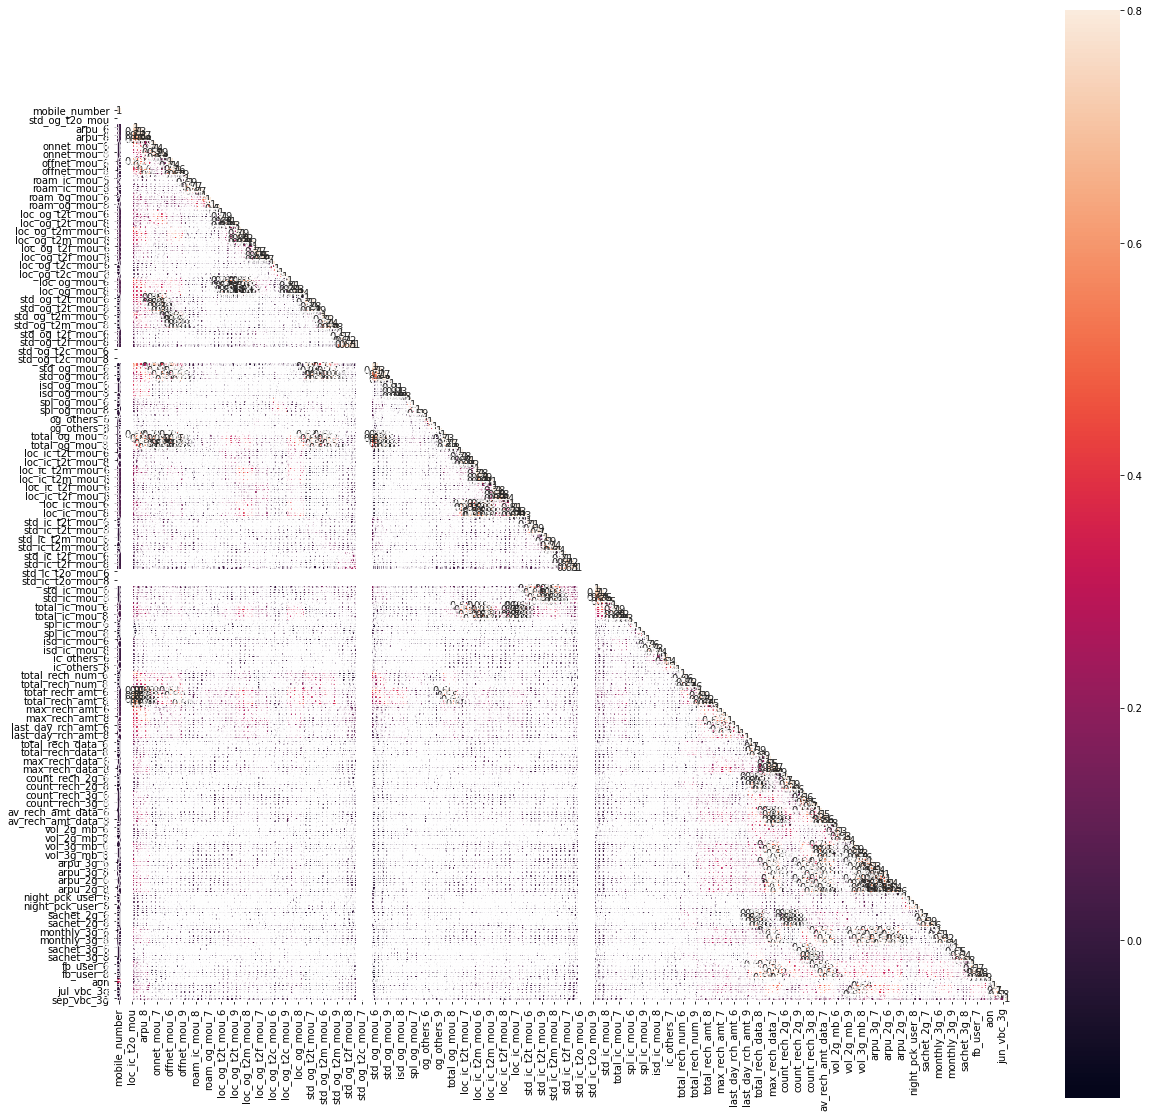

In [36]:
# heatmap - not much readability but showing multicolliearity which will be treated with PCA
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

In [37]:
# Pairwise scatter plot
#sns.pairplot(churn_numerical)
#plt.show()

### Data Preparation

### 1. Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

###### input -> churn_model_pre

### 1. Filter high-value customers 
#### Top 20% generate 80% revenue ->Total recharge amount 

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

After filtering the high-value customers, you should get about 29.9k rows.
##### Good Phase
    1.Calculate Data recharge amount for June and July each
    •Number of recharges( total_rech_data ) * avg recharge amount( av_rech_amt_data
    2.Calculate total recharge amount (data + for June and July each
    •Data recharge amount + Call recharge amount( total_rech_amt
    3.Calculate average recharge amount done by customer in June and July
    4.Look at the 70th percentile recharge amount
    5.Retain only those customers who have recharged their mobiles with more than or equal to 70th
    percentile amount.
  -  Data columns to be analysed -
        total_rech_num_6
        total_rech_amt_6
        max_rech_amt_6
        max_rech_data_6
        count_rech_2g_6
        count_rech_3g_6
        av_rech_amt_data_6

In [38]:


# Calculate total recharge amount for month 6
churn_model_pre['tot_rech_amt_data_6'] = churn_model_pre['total_rech_data_6'] * churn_model_pre['av_rech_amt_data_6']
churn_model_pre['tot_rech_call_data_amt_6'] = churn_model_pre['tot_rech_amt_data_6'] + churn_model_pre['total_rech_amt_6']


# Calculate total recharge amount for month 7

churn_model_pre['tot_rech_amt_data_7'] = churn_model_pre['total_rech_data_7'] * churn_model_pre['av_rech_amt_data_7']
churn_model_pre['tot_rech_call_data_amt_7'] = churn_model_pre['tot_rech_amt_data_7'] + churn_model_pre['total_rech_amt_7']


In [39]:
churn_model_pre.head(10)

,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,monthly_2g_9_1,monthly_2g_9_2,monthly_2g_9_3,monthly_2g_9_4,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_rech_amt_data_6,tot_rech_call_data_amt_6,tot_rech_amt_data_7,tot_rech_call_data_amt_7
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.0

In [40]:
churn_model_pre['avg_rech_call_data_amt_6_7'] = (churn_model_pre['tot_rech_call_data_amt_6'] + churn_model_pre['tot_rech_call_data_amt_7'])/2

print(churn_model_pre['avg_rech_call_data_amt_6_7'].describe())

# calculate percentile 
from numpy import percentile
  
avg_rech_call_data_amt_6_7_percen = percentile(churn_model_pre['avg_rech_call_data_amt_6_7'], 70)
print(avg_rech_call_data_amt_6_7_percen)

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
75%        553.000000
max      61236.000000
Name: avg_rech_call_data_amt_6_7, dtype: float64
478.0


In [41]:
churn_hvc = churn_model_pre[churn_model_pre['avg_rech_call_data_amt_6_7'] >= avg_rech_call_data_amt_6_7_percen]
churn_hvc.shape

(30001, 232)

### 2. Tag churners and remove attributes of the churn phase - Derive Target Variable
#### 9 th month is the Churn Month - Derive churn using 9 th Month's data

#### Input : churn_hvc

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes used to tag churners are:

        total_ic_mou_9
        total_og_mou_9
        vol_2g_mb_9
        vol_3g_mb_9


  - After tagging churners with Derived column -> 'churn' ( 1=  yes, 0 = no ),
  - Remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).Drop all 9 month columns


In [42]:
import numpy as np
#churn_hvc['churn'] = np.where((churn_hvc['total_ic_mou_9'] == 0 & churn_hvc['total_og_mou_9'] == 0.0), 1, 0)
churn_hvc['total_ic_mou_9'] = churn_hvc['total_ic_mou_9'].astype('int64')
churn_hvc['total_og_mou_9'] = churn_hvc['total_og_mou_9'].astype('int64')
churn_hvc['vol_2g_mb_9'] = churn_hvc['vol_2g_mb_9'].astype('int64')
churn_hvc['vol_3g_mb_9'] = churn_hvc['vol_3g_mb_9'].astype('int64')

conditions =[(churn_hvc['total_og_mou_9'] == 0) & (churn_hvc['total_ic_mou_9'] == 0) & (churn_hvc['vol_2g_mb_9'] == 0) & (churn_hvc['vol_3g_mb_9'] == 0)]

churn_hvc["churn"] = np.where(conditions, 1, 0).reshape(-1,1)


In [43]:
#Test the sample churn values
churn_hvc[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0,0,0,0,1
7,0,0,0,0,1
8,34,142,0,0,0
21,252,1031,0,0,0
23,127,127,13,314,0


#### Calculate Churn Percentage 

In [44]:
print(churn_hvc['churn'].value_counts())

print(churn_hvc['churn'].value_counts()[0]/ len(churn_hvc))

print(churn_hvc['churn'].value_counts()[1]/ len(churn_hvc))

0    27485
1     2516
Name: churn, dtype: int64
0.9161361287957068
0.08386387120429319


### Drop the columns that belong to the churn month

In [45]:
field_9_remove_col = ['monthly_2g_9_1', 'monthly_2g_9_2', 'monthly_2g_9_3', 'monthly_2g_9_4',
       'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9']
churn_hvc.drop(field_9_remove_col, axis =1, inplace = True)


In [46]:
churn_hvc.head()

,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_rech_amt_data_6,tot_rech_call_data_amt_6,tot_rech_amt_data_7,tot_rech_call_data_amt_7,avg_rech_call_data_amt_6_7,churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,614.0,252.0,504.0,559.0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,3

### Understanding Customer Behaviour During Churn
  -  Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). 
  - In churn prediction, we assume that there are three phases of customer lifecycle :

##### The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

##### The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

##### The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

  -  In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.
  
  
  -  The data dictionary contains meanings of abbreviations. Some frequent ones are loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge) etc.
  -  The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.

### 3. Derived variables ( Calculate difference between 8th and previous months)

In [47]:
churn_hvc['derive_diff_arpu'] = churn_hvc['arpu_6'] - ((churn_hvc['arpu_6'] + churn_hvc['arpu_7'])/2)

In [48]:
churn_hvc['derive_diff_loc_og'] = churn_hvc['loc_og_mou_8'] - ((churn_hvc['loc_og_mou_6'] + churn_hvc['loc_og_mou_7'])/2)
churn_hvc['derive_diff_loc_ic'] = churn_hvc['loc_ic_mou_8'] - ((churn_hvc['loc_ic_mou_6'] + churn_hvc['loc_ic_mou_7'])/2)
churn_hvc['derive_diff_std_og'] = churn_hvc['std_og_mou_8'] - ((churn_hvc['std_og_mou_6'] + churn_hvc['std_og_mou_7'])/2)
churn_hvc['derive_diff_std_ic'] = churn_hvc['std_ic_mou_8'] - ((churn_hvc['std_ic_mou_6'] + churn_hvc['std_ic_mou_7'])/2)
churn_hvc['derive_diff_roam_og'] = churn_hvc['roam_og_mou_8'] - ((churn_hvc['roam_og_mou_6'] + churn_hvc['roam_og_mou_7'])/2)
churn_hvc['derive_diff_roam_ic'] = churn_hvc['roam_ic_mou_8'] - ((churn_hvc['roam_ic_mou_6'] + churn_hvc['roam_ic_mou_7'])/2)




In [49]:
churn_hvc.head()

,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_rech_amt_data_6,tot_rech_call_data_amt_6,tot_rech_amt_data_7,tot_rech_call_data_amt_7,avg_rech_call_data_amt_6_7,churn,derive_diff_arpu,derive_diff_loc_og,derive_diff_loc_ic,derive_diff_std_og,derive_diff_std_ic,derive_diff_roam_og,derive_diff_roam_ic
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,614.0,252.0,504.0,559.0,1,-8.7155,-64.3975,-86.915,-11.365,-5.925,0.000,0.00
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.

### Outlier Treatment

In [50]:
churn_hvc.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_rech_amt_data_6,tot_rech_call_data_amt_6,tot_rech_amt_data_7,tot_rech_call_data_amt_7,avg_rech_call_data_amt_6_7,churn,derive_diff_arpu,derive_diff_loc_og,derive_diff_loc_ic,derive_diff_std_og,derive_diff_std_ic,derive_diff_roam_og,derive_diff_roam_ic
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,3.000100e+04,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,

In [51]:
# Treatment of outliers - function to calculate interquartile range
from numpy.random import randn
from numpy import percentile

def outlier_treatment(datacolumn):
    
    q25, q75, q50 = percentile(datacolumn, 25), percentile(datacolumn, 75), percentile(datacolumn, 50)
    iqr = q75 - q25

    # calculate the outlier cutoff
    # cut_off = iqr * 1.5
    # extreme outliers - >
    cut_off = iqr * 3
    lower, upper = q25 - cut_off, q75 + cut_off
    return iqr, lower, upper, q25, q75, q50

In [52]:
#Treat  for outliers - 
def checkOutlier(data, checkOutlierCol):
        for count in range(0,len(checkOutlierCol)) :
            
            iqr, lower, upper, q25, q75, q50 = outlier_treatment(data[checkOutlierCol[count]])

            print(checkOutlierCol[count], " : ", iqr)
            print(checkOutlierCol[count], " : ",lower)
            print(checkOutlierCol[count], " : ",upper)

            Upper_outliers =data.loc[data[checkOutlierCol[count]] > upper]
            Lower_outliers =data.loc[data[checkOutlierCol[count]] < lower]
            print(checkOutlierCol[count], ": Number of rows present above upper cutoff : ", Upper_outliers.shape)
            print(checkOutlierCol[count], ": Number of rows present below lower cutoff : ",Lower_outliers.shape)
            print(checkOutlierCol[count] , ': Percentiles: 25th=%.3f, 75th=%.3f, 50th=%.3f, IQR=%.3f' % (q25, q75, q50, iqr))

In [53]:
# Display the outliers
ChkOutlierCols = churn_hvc.columns
checkOutlier(churn_hvc, ChkOutlierCols)

monthly_2g_6_1  :  0.0
monthly_2g_6_1  :  0.0
monthly_2g_6_1  :  0.0
monthly_2g_6_1 : Number of rows present above upper cutoff :  (4021, 186)
monthly_2g_6_1 : Number of rows present below lower cutoff :  (0, 186)
monthly_2g_6_1 : Percentiles: 25th=0.000, 75th=0.000, 50th=0.000, IQR=0.000
monthly_2g_6_2  :  0.0
monthly_2g_6_2  :  0.0
monthly_2g_6_2  :  0.0
monthly_2g_6_2 : Number of rows present above upper cutoff :  (551, 186)
monthly_2g_6_2 : Number of rows present below lower cutoff :  (0, 186)
monthly_2g_6_2 : Percentiles: 25th=0.000, 75th=0.000, 50th=0.000, IQR=0.000
monthly_2g_6_3  :  0.0
monthly_2g_6_3  :  0.0
monthly_2g_6_3  :  0.0
monthly_2g_6_3 : Number of rows present above upper cutoff :  (28, 186)
monthly_2g_6_3 : Number of rows present below lower cutoff :  (0, 186)
monthly_2g_6_3 : Percentiles: 25th=0.000, 75th=0.000, 50th=0.000, IQR=0.000
monthly_2g_6_4  :  0.0
monthly_2g_6_4  :  0.0
monthly_2g_6_4  :  0.0
monthly_2g_6_4 : Number of rows present above upper cutoff :  (7

roam_ic_mou_8 : Number of rows present above upper cutoff :  (5338, 186)
roam_ic_mou_8 : Number of rows present below lower cutoff :  (0, 186)
roam_ic_mou_8 : Percentiles: 25th=0.000, 75th=0.000, 50th=0.000, IQR=0.000
roam_og_mou_6  :  0.0
roam_og_mou_6  :  0.0
roam_og_mou_6  :  0.0
roam_og_mou_6 : Number of rows present above upper cutoff :  (6374, 186)
roam_og_mou_6 : Number of rows present below lower cutoff :  (0, 186)
roam_og_mou_6 : Percentiles: 25th=0.000, 75th=0.000, 50th=0.000, IQR=0.000
roam_og_mou_7  :  0.0
roam_og_mou_7  :  0.0
roam_og_mou_7  :  0.0
roam_og_mou_7 : Number of rows present above upper cutoff :  (5121, 186)
roam_og_mou_7 : Number of rows present below lower cutoff :  (0, 186)
roam_og_mou_7 : Percentiles: 25th=0.000, 75th=0.000, 50th=0.000, IQR=0.000
roam_og_mou_8  :  0.0
roam_og_mou_8  :  0.0
roam_og_mou_8  :  0.0
roam_og_mou_8 : Number of rows present above upper cutoff :  (5314, 186)
roam_og_mou_8 : Number of rows present below lower cutoff :  (0, 186)
roam_

spl_og_mou_8  :  6.15
spl_og_mou_8  :  -18.450000000000003
spl_og_mou_8  :  24.6
spl_og_mou_8 : Number of rows present above upper cutoff :  (1949, 186)
spl_og_mou_8 : Number of rows present below lower cutoff :  (0, 186)
spl_og_mou_8 : Percentiles: 25th=0.000, 75th=6.150, 50th=0.430, IQR=6.150
og_others_6  :  0.0
og_others_6  :  0.0
og_others_6  :  0.0
og_others_6 : Number of rows present above upper cutoff :  (6850, 186)
og_others_6 : Number of rows present below lower cutoff :  (0, 186)
og_others_6 : Percentiles: 25th=0.000, 75th=0.000, 50th=0.000, IQR=0.000
og_others_7  :  0.0
og_others_7  :  0.0
og_others_7  :  0.0
og_others_7 : Number of rows present above upper cutoff :  (153, 186)
og_others_7 : Number of rows present below lower cutoff :  (0, 186)
og_others_7 : Percentiles: 25th=0.000, 75th=0.000, 50th=0.000, IQR=0.000
og_others_8  :  0.0
og_others_8  :  0.0
og_others_8  :  0.0
og_others_8 : Number of rows present above upper cutoff :  (171, 186)
og_others_8 : Number of rows pr

std_ic_mou_7 : Number of rows present above upper cutoff :  (1790, 186)
std_ic_mou_7 : Number of rows present below lower cutoff :  (0, 186)
std_ic_mou_7 : Percentiles: 25th=1.430, 75th=43.810, 50th=12.090, IQR=42.380
std_ic_mou_8  :  37.35
std_ic_mou_8  :  -111.02000000000001
std_ic_mou_8  :  150.43
std_ic_mou_8 : Number of rows present above upper cutoff :  (1894, 186)
std_ic_mou_8 : Number of rows present below lower cutoff :  (0, 186)
std_ic_mou_8 : Percentiles: 25th=1.030, 75th=38.380, 50th=9.290, IQR=37.350
total_ic_mou_6  :  299.11
total_ic_mou_6  :  -824.45
total_ic_mou_6  :  1269.3200000000002
total_ic_mou_6 : Number of rows present above upper cutoff :  (708, 186)
total_ic_mou_6 : Number of rows present below lower cutoff :  (0, 186)
total_ic_mou_6 : Percentiles: 25th=72.880, 75th=371.990, 50th=183.730, IQR=299.110
total_ic_mou_7  :  298.32
total_ic_mou_7  :  -815.97
total_ic_mou_7  :  1272.27
total_ic_mou_7 : Number of rows present above upper cutoff :  (741, 186)
total_ic_m

av_rech_amt_data_8 : Number of rows present above upper cutoff :  (370, 186)
av_rech_amt_data_8 : Number of rows present below lower cutoff :  (0, 186)
av_rech_amt_data_8 : Percentiles: 25th=0.000, 75th=196.000, 50th=25.000, IQR=196.000
vol_2g_mb_6  :  83.45
vol_2g_mb_6  :  -250.35000000000002
vol_2g_mb_6  :  333.8
vol_2g_mb_6 : Number of rows present above upper cutoff :  (3626, 186)
vol_2g_mb_6 : Number of rows present below lower cutoff :  (0, 186)
vol_2g_mb_6 : Percentiles: 25th=0.000, 75th=83.450, 50th=0.000, IQR=83.450
vol_2g_mb_7  :  77.77
vol_2g_mb_7  :  -233.31
vol_2g_mb_7  :  311.08
vol_2g_mb_7 : Number of rows present above upper cutoff :  (3744, 186)
vol_2g_mb_7 : Number of rows present below lower cutoff :  (0, 186)
vol_2g_mb_7 : Percentiles: 25th=0.000, 75th=77.770, 50th=0.050, IQR=77.770
vol_2g_mb_8  :  51.65
vol_2g_mb_8  :  -154.95
vol_2g_mb_8  :  206.6
vol_2g_mb_8 : Number of rows present above upper cutoff :  (4055, 186)
vol_2g_mb_8 : Number of rows present below lowe

avg_rech_call_data_amt_6_7  :  605.0
avg_rech_call_data_amt_6_7  :  -1212.0
avg_rech_call_data_amt_6_7  :  3023.0
avg_rech_call_data_amt_6_7 : Number of rows present above upper cutoff :  (1275, 186)
avg_rech_call_data_amt_6_7 : Number of rows present below lower cutoff :  (0, 186)
avg_rech_call_data_amt_6_7 : Percentiles: 25th=603.000, 75th=1208.000, 50th=800.000, IQR=605.000
churn  :  0.0
churn  :  0.0
churn  :  0.0
churn : Number of rows present above upper cutoff :  (2516, 186)
churn : Number of rows present below lower cutoff :  (0, 186)
churn : Percentiles: 25th=0.000, 75th=0.000, 50th=0.000, IQR=0.000
derive_diff_arpu  :  142.86400000000003
derive_diff_arpu  :  -500.81150000000014
derive_diff_arpu  :  499.2365000000001
derive_diff_arpu : Number of rows present above upper cutoff :  (291, 186)
derive_diff_arpu : Number of rows present below lower cutoff :  (319, 186)
derive_diff_arpu : Percentiles: 25th=-72.220, 75th=70.644, 50th=-0.006, IQR=142.864
derive_diff_loc_og  :  90.7400

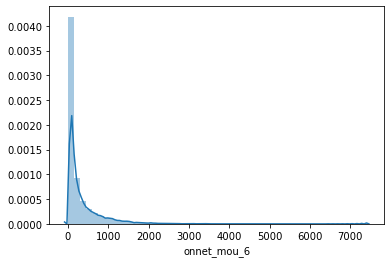

In [54]:
# Plot SalePrice before log transformation
sns.distplot(churn_hvc['onnet_mou_6'])
plt.show()

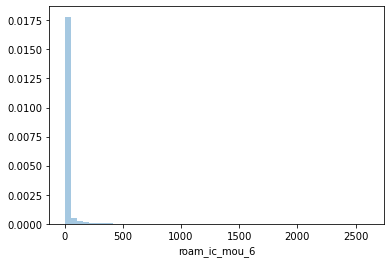

In [55]:
# Plot SalePrice before log transformation
sns.distplot(churn_hvc['roam_ic_mou_6'])
plt.show()

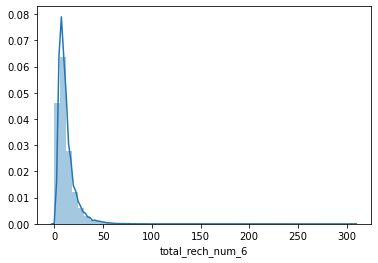

In [56]:
# Plot SalePrice before log transformation
sns.distplot(churn_hvc['total_rech_num_6'])
plt.show()

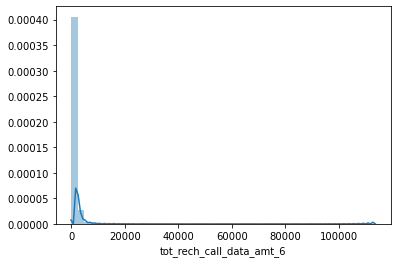

In [57]:
# Plot SalePrice before log transformation
sns.distplot(churn_hvc['tot_rech_call_data_amt_6'])
plt.show()

### Treating outliers 



In [58]:
# There are sseveral outliers in more than 100 predictors. 
#Hence the removal will loose lot of information. Hence log scale used to treat the outliers.

churn_hvc_clean = churn_hvc.copy()
allCol = ["arpu_6", "arpu_7","arpu_8","total_rech_num_6", "total_rech_num_7","total_rech_num_8","total_rech_amt_6","total_rech_amt_7",
"av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","vol_2g_mb_6","vol_2g_mb_7",
"vol_2g_mb_8", "vol_3g_mb_6","vol_3g_mb_7", "vol_3g_mb_8", "arpu_3g_6", "arpu_3g_7", "arpu_3g_8",
"arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "total_rech_amt_8", "max_rech_amt_6", "max_rech_amt_7",
"max_rech_amt_8", "last_day_rch_amt_6", "last_day_rch_amt_7", "last_day_rch_amt_8",
"aug_vbc_3g","jul_vbc_3g", "jun_vbc_3g", "sep_vbc_3g", "tot_rech_amt_data_6",
"tot_rech_call_data_amt_6", "tot_rech_amt_data_7", "tot_rech_call_data_amt_7","derive_diff_arpu",
"derive_diff_loc_og", "derive_diff_loc_ic", "derive_diff_std_og","derive_diff_std_ic",
"derive_diff_roam_og", "derive_diff_roam_ic"]


print(allCol)
for i in range(0, len(allCol)):
    churn_hvc_clean[allCol[i]] = churn_hvc_clean[allCol[i]].map(lambda x: np.log(x) if x > 0 else 0)

churn_hvc_clean.head()

['arpu_6', 'arpu_7', 'arpu_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'tot_rech_amt_data_6', 'tot_rech_call_data_amt_6', 'tot_rech_amt_data_7', 'tot_rech_call_data_amt_7', 'derive_diff_arpu', 'derive_diff_loc_og', 'derive_diff_loc_ic', 'derive_diff_std_og', 'derive_diff_std_ic', 'derive_diff_roam_og', 'derive_diff_roam_ic']


,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_rech_amt_data_6,tot_rech_call_data_amt_6,tot_rech_amt_data_7,tot_rech_call_data_amt_7,avg_rech_call_data_amt_6_7,churn,derive_diff_arpu,derive_diff_loc_og,derive_diff_loc_ic,derive_diff_std_og,derive_diff_std_ic,derive_diff_roam_og,derive_diff_roam_ic
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7000842753,0.0,0.0,0.0,5.285156,5.369782,5.365055,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.386294,1.098612,0.693147,5.891644,5.529429,5.529429,5.529429,5.529429,5.529429,5.529429,5.529429,5.529429,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,5.529429,5.529429,5.529429,3.405521,0.277632,1.749200,4.425685,5.015689,4.696929,5.357388,5.357388,5.357388,5.357388,5.357388,5.357388,0.0,0.0,0.0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,3.414443,0.000000,4.617099,1.275363,5.529429,6.419995,5.529429,6.222576,559.0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7000701601,0.0,0.0,0.0,6.974647,7.207749,8.061954,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.2

## Model-1 with PCA for high performance model

Predictor : 50 or 60
#### Input -> churn_hvc 

In [59]:
missing_columns = churn_hvc.columns[100*(churn_hvc .isnull().sum()/len(churn_hvc .index)) > 0]
missing_columns

Index([], dtype='object')

### Model Building

#### Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

  -  It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

  -  It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

  -  In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

####  Handle class-imbalance when building model : Give balanced dataset to train .  Since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

##### When performing Train-test-split apply stratify 

##### SMOT when building teh model - equal prefernce to zero & one

#### Modeil Building approach
  - Train-Test-Split
  - Scaling  

  - Reduce the number of variables using PCA.

  - Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

  - Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.
  -  use 6-7-8 month data

#### input churn_svc_PCA copied from churn_hvc_clean 

In [60]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
churn_hvc_PCA = churn_hvc_clean.copy()
#churn_hvc_PCA = churn_hvc.copy()

X = churn_hvc_PCA.drop(['churn', 'mobile_number'],axis=1)


# Putting response variable to y
y = churn_hvc_PCA['churn']



In [61]:
print(y.head())
print(churn_hvc_PCA.head())

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32
    monthly_2g_6_1  monthly_2g_6_2  monthly_2g_6_3  monthly_2g_6_4  \
0                0               0               0               0   
7                0               0               0               0   
8                0               0               0               0   
21               0               0               0               0   
23               0               0               0               0   

    monthly_2g_7_1  monthly_2g_7_2  monthly_2g_7_3  monthly_2g_7_4  \
0                0               0               0               0   
7                0               0               0               0   
8                1               0               0               0   
21               0               0               0               0   
23               0               0               0               0   

    monthly_2g_7_5  monthly_2g_8_1  monthly_2g_8_2  monthly_2g_8_3  \
0                0    

In [62]:
# Pairwise scatter plot - commented as taking lot of time 
#sns.pairplot(X)
#plt.show()

In [63]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100, stratify=y)

X_train_hyper = X_train.copy()
X_test_hyper = X_test.copy()
y_test_hyper = y_test.copy()
y_train_hyper = y_train.copy()


In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 184)
(9001, 184)
(21000,)
(9001,)


### Scale the data

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_train_hyper = X_train.copy()



In [66]:
X_train

array([[-0.39287856, -0.13262641, -0.03087538, ..., -0.56305211,
        -0.32562783, -0.31212761],
       [ 2.54531579, -0.13262641, -0.03087538, ..., -0.56305211,
        -0.32562783, -0.31212761],
       [-0.39287856, -0.13262641, -0.03087538, ..., -0.56305211,
        -0.32562783, -0.31212761],
       ...,
       [-0.39287856, -0.13262641, -0.03087538, ..., -0.56305211,
        -0.32562783, -0.31212761],
       [-0.39287856, -0.13262641, -0.03087538, ...,  1.28392235,
        -0.32562783, -0.31212761],
       [-0.39287856, -0.13262641, -0.03087538, ..., -0.56305211,
        -0.32562783, -0.31212761]])

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA(random_state=42)

In [69]:
pca.fit(X_train)

PCA(random_state=42)

In [70]:
pca.components_

array([[-4.94169902e-02, -2.04518719e-02, -6.17318907e-03, ...,
         2.19540032e-02,  2.51385442e-02,  1.77606763e-02],
       [ 2.26002115e-02,  1.09688338e-03,  7.87951076e-04, ...,
         4.22047887e-02,  1.00107497e-02,  1.39325873e-02],
       [-4.17067691e-02, -2.15070343e-02,  2.51105079e-03, ...,
         4.67215483e-02,  3.07104897e-02,  2.16087852e-02],
       ...,
       [-0.00000000e+00, -6.57466989e-17, -7.81759696e-17, ...,
         2.08166817e-17, -1.35308431e-16,  1.31838984e-16],
       [-0.00000000e+00, -6.72686862e-17, -6.82286510e-17, ...,
        -1.73472348e-17,  3.46944695e-18, -1.21430643e-17],
       [-0.00000000e+00, -9.41211071e-17,  5.92904430e-18, ...,
        -1.29579100e-17,  2.99239800e-17, -6.24500451e-17]])

In [71]:
pca.explained_variance_ratio_

array([1.18287172e-01, 7.69811686e-02, 5.19916475e-02, 4.49489418e-02,
       3.38439095e-02, 3.10037822e-02, 2.60516367e-02, 2.50434124e-02,
       2.22545231e-02, 2.03068410e-02, 1.94624657e-02, 1.83800092e-02,
       1.81636562e-02, 1.59777538e-02, 1.58849762e-02, 1.47173763e-02,
       1.43754390e-02, 1.41816081e-02, 1.35206946e-02, 1.23466070e-02,
       1.15257397e-02, 1.09500056e-02, 1.08677912e-02, 1.05887506e-02,
       1.03126300e-02, 1.01283076e-02, 9.33909530e-03, 9.31227367e-03,
       8.68068021e-03, 8.21771185e-03, 7.57788186e-03, 7.41354924e-03,
       7.10148635e-03, 7.00511305e-03, 6.77930332e-03, 6.61723122e-03,
       6.55313569e-03, 6.47111443e-03, 6.34190680e-03, 6.21437365e-03,
       6.11783834e-03, 6.02024897e-03, 5.90360324e-03, 5.83466321e-03,
       5.70920960e-03, 5.51368926e-03, 5.46605746e-03, 5.38795138e-03,
       5.15658664e-03, 5.07602381e-03, 5.00117522e-03, 4.94067050e-03,
       4.91745497e-03, 4.84211024e-03, 4.67583457e-03, 4.57639429e-03,
      

In [72]:
#Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

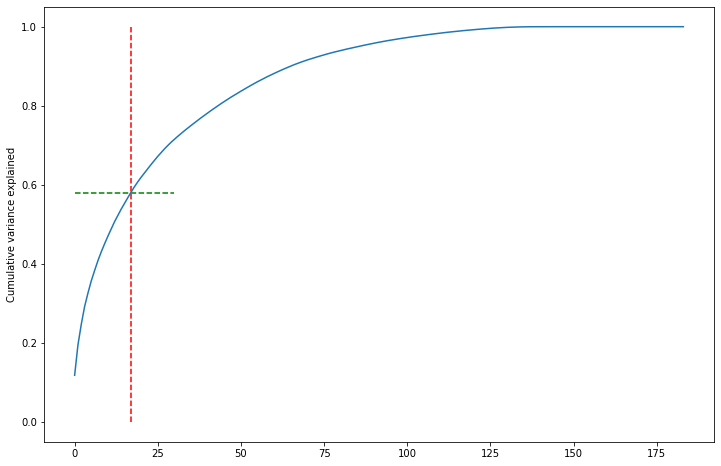

In [73]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=17, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.58, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### Perform PCA with 17 components

In [74]:
from sklearn.decomposition import IncrementalPCA

In [75]:
pca_final = IncrementalPCA(n_components=17)

In [76]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca_hyper = df_train_pca.copy()

In [77]:
df_train_pca.shape

(21000, 17)

In [78]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(17, 17)

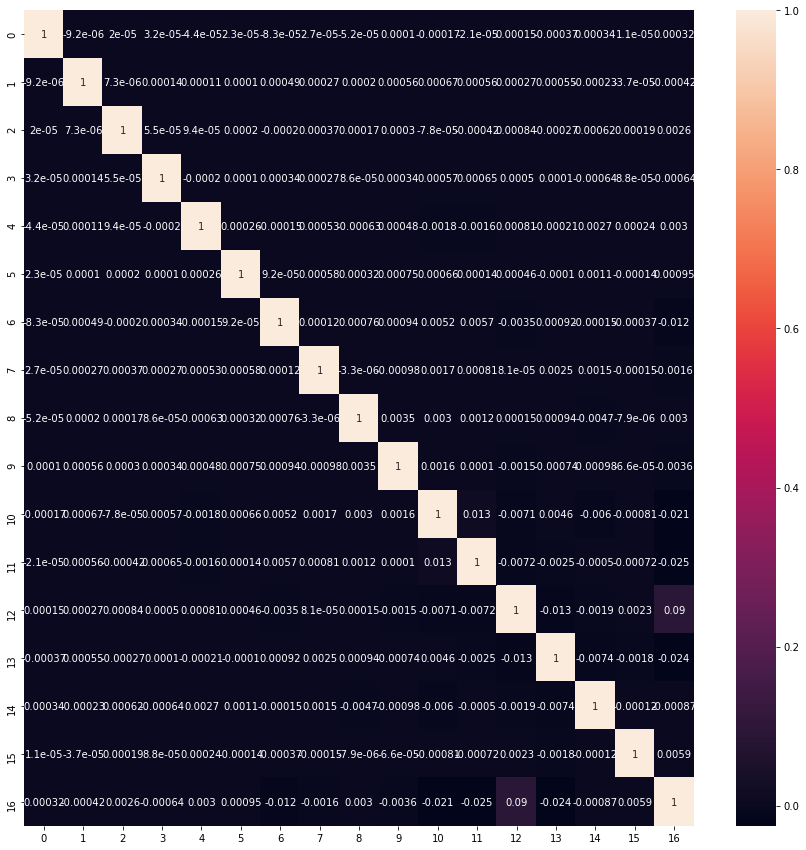

In [79]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

### Multicollinearity Test - No multicollinearity exits in the trained PCA dataset

### Applying the PCA transformation on the test set X_test

In [80]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 17)

In [81]:
df_test_pca


array([[  95.36198786,  132.84110831,  155.90362904, ...,  -30.51590875,
           9.54560108,   88.84742449],
       [ -44.45938172,  856.2455722 ,  925.56243735, ..., -291.43009757,
          47.4177003 ,  527.23903846],
       [ 174.53916903,  163.9967599 ,  130.07342893, ...,  -30.84445351,
          10.92207605,  107.42539317],
       ...,
       [  78.58550735,  351.80339352,  162.31125269, ...,  -67.53040635,
          13.33854471,  132.26341269],
       [-753.23855975, 1900.82496038,  161.51287331, ..., -218.90244851,
          -2.08737951,  -47.9646939 ],
       [-272.45202613, 1996.41693628, -386.88747051, ..., -104.25710171,
          25.3434702 ,  143.71871374]])

### Model Evaluation - Selecting model based on evaluation metric.

  -  The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

  -  Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. 

#### A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.


### Logistic Regression  
 
#### Objective: Identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

##### Hanlde Imbalance - using parameter class-weight = "balance" with LogisticRegression(x,y, class-weight = "balance") 
  
Features :PCA Components

Input : PCA Trained fit Model

### Applying logistic regression on the PCA-train data on the Principal components

In [82]:

from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression(class_weight='balanced') 

model_pca = learner_pca.fit(df_train_pca, y_train)


### Making predictions on the test set which is transformed by PCA

#### Calculate the Model Accuracy Scoe



In [83]:
# Predict Test data
pred_probs_test = model_pca.predict_proba(df_test_pca)

# Calculating the Model score using AUC

"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.8'

In [84]:
pred_probs_test

array([[6.00090429e-005, 9.99939991e-001],
       [9.99974565e-001, 2.54351405e-005],
       [5.27633275e-001, 4.72366725e-001],
       ...,
       [9.99998766e-001, 1.23420676e-006],
       [1.00000000e+000, 5.63641492e-159],
       [1.00000000e+000, 2.87883452e-164]])

### Model Evaluation

#### Calculate CONFUSION MATRIXS - precision , recal & accuracy score, ROC curve, 

In [85]:
# Let's take a look at the confusion matrix again 
#confusion = metrics.confusion_matrix(pred_probs_test, pred_probs_train )
#confusion

In [86]:

# Converting y_pred to a dataframe which is an array
pred_probs_test_df = pd.DataFrame(pred_probs_test)
# Converting to column dataframe
pred_probs_test_1 = pred_probs_test_df.iloc[:,[1]]
# Let's see the head
pred_probs_test_1.head()

,1
0,9.999400e-01
1,2.543514e-05
2,4.723667e-01
3,2.385234e-18
4,0.000000e+00


In [87]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
70012,0
96610,0
75679,0
20243,1
87483,0


In [88]:
# Putting Mobile Number to index
y_test_df['mobile_number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
pred_probs_test_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and pred_probs_test_1
y_pred_final = pd.concat([y_test_df,pred_probs_test_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Mobile No','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,mobile_number,Churn_Prob
0,0,70012,9.999400e-01
1,0,96610,2.543514e-05
2,0,75679,4.723667e-01
3,1,20243,2.385234e-18
4,0,87483,0.000000e+00


In [89]:
y_test_df.index

RangeIndex(start=0, stop=9001, step=1)

In [90]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,churn,mobile_number,Churn_Prob,predicted
0,0,70012,9.999400e-01,1
1,0,96610,2.543514e-05,0
2,0,75679,4.723667e-01,0
3,1,20243,2.385234e-18,0
4,0,87483,0.000000e+00,0


In [91]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6521, 1725],
       [ 258,  497]], dtype=int64)

In [92]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.7796911454282858

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

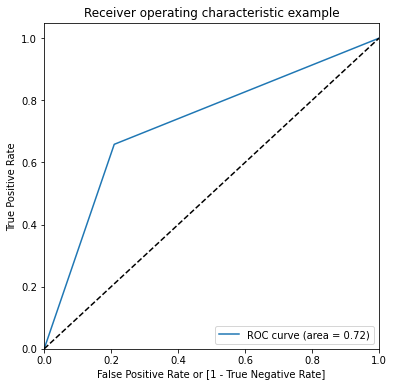

(array([0.        , 0.20919234, 1.        ]),
 array([0.        , 0.65827815, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [94]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [95]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)

accuracy = "{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.Churn_Prob))

### Precision Score

TP / TP + FP
Precision is the ratio between the True Positives and all the Positives. For our problem statement, that would be the measure of customers that the model correctly identify will Churn out of all the customers actually churn. 

In [96]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
precision = round(precision_score(y_pred_final.churn, y_pred_final.predicted), 4)


### Recall Score
TP / TP + FN
  -  This is important for this model as the main objective is to identify the churn indicators correctly.
  -  Imbalance has been hanldled for this using stratify and class weight.

The recall is the measure of our model correctly identifying True Positives( customer will churn).
Thus, for all the customers who will actually churn, recall tells us how many the model correctly 
identified as will churn.

In [97]:
recall = round(recall_score(y_pred_final.churn, y_pred_final.predicted), 4)

In [98]:
print("***************PCA Trained Logistic Regression Model Performance *****************")
print ("Accuracy: ", accuracy)
print ("Precision: ", precision)
print ("Recall: ", recall)

print("\n***************This is the Final high performance PCA Model to predict the Churn of teh customer *****************")

***************PCA Trained Logistic Regression Model Performance *****************
Accuracy:  0.80
Precision:  0.2237
Recall:  0.6583

***************This is the Final high performance PCA Model to predict the Churn of teh customer *****************


### The business problem needs to identify customer churn properly, so it is important to identify True Positive.

#### Hence Recall score is higher the better, so there is a trade off , Precision score will go down.

#### Our PCA Model -1  is showing a dscent Recall Score = 66% after handling the imbalance with stratify & class weight = balanced.

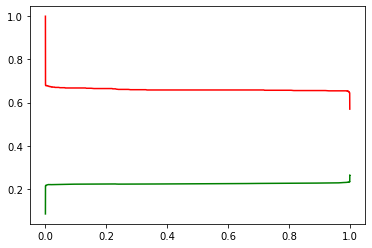

In [99]:
from sklearn.metrics import precision_recall_curve
y_pred_final.churn, y_pred_final.predicted
p, r, thresholds = precision_recall_curve(y_pred_final.churn, y_pred_final.Churn_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Model-2 without PCA -> RFE /VIF  & Model - Decision Tree

PCA usually creates components which are not easy to interpret. Therefore, building another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. 

#### A good choice to identify important variables is a DecisionTree Model. 

Target : Feature Selection approx : 10 or 15
Good Predictive Model with high Interpretability

#### Handle imbalance data using proper parameter.



In [100]:
# Putting feature variable to X
X = churn_hvc.drop('churn',axis=1)

# Putting response variable to y
y = churn_hvc['churn']

In [101]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99, stratify=y)
X_train.head()

,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_rech_amt_data_6,tot_rech_call_data_amt_6,tot_rech_amt_data_7,tot_rech_call_data_amt_7,avg_rech_call_data_amt_6_7,derive_diff_arpu,derive_diff_loc_og,derive_diff_loc_ic,derive_diff_std_og,derive_diff_std_ic,derive_diff_roam_og,derive_diff_roam_ic
4410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7001629944,0.0,0.0,0.0,478.910,389.034,624.461,187.49,188.63,212.46,290.18,425.63,181.38,0.0,0.0,12.73,0.0,0.0,11.06,185.69,184.48,204.51,277.88,407.91,170.73,4.14,9.28,1.90,0.00,0.00,0.00,467.73,601.68,377.14,1.79,4.14,0.00,4.66,1.06,5.63,3.48,7.36,0.0,0.0,0.0,0.0,9.94,12.58,5.63,0.0,0.0,0.0,6.89,11.39,12.98,4.16,0.0,0.0,488.74,625.66,395.76,49.16,53.99,58.79,173.71,167.14,162.69,16.81,35.59,39.79,239.69,256.74,261.29,16.35,5.16,0.00,13.76,20.76,0.00,1.09,0.88,0.00,0.0,0.0,0.0,31.21,26.81,0.00,270.91,283.56,261.33,0.00,0.0,0.00,0.00,0.00,0.03,0.00,0.00,0.00,18,14,20,548,456,713,38,50,130,38,50,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3415,0.0,0.0,0.0,0.0,0.0,548.0,0.0,456.0,502.0,44.9380,-157.565,13.075,-5.630,-29.010,11.06,12.73
21377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7001928347,0.0,0.0,0.0,213.815,213.795,213.124,0.00,0.00,32.36,0.00,0.00,92.14,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,11.73,0.00,0.00,40.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.73,0.00,0.00,0.00,0.00,0.00,3.31,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,10.41,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0

In [102]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

from six import StringIO 
# Importing required packages for visualization
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV




In [103]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree


# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [104]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9401904761904761
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       min_samples_split=50)


In [105]:
dt_tuned = DecisionTreeClassifier(max_depth=5,min_samples_leaf=50, min_samples_split=50)

In [106]:
rfe = RFE(dt_tuned, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [107]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('monthly_2g_6_1', False, 171),
 ('monthly_2g_6_2', False, 170),
 ('monthly_2g_6_3', False, 169),
 ('monthly_2g_6_4', False, 168),
 ('monthly_2g_7_1', False, 167),
 ('monthly_2g_7_2', False, 166),
 ('monthly_2g_7_3', False, 165),
 ('monthly_2g_7_4', False, 164),
 ('monthly_2g_7_5', False, 163),
 ('monthly_2g_8_1', False, 162),
 ('monthly_2g_8_2', False, 161),
 ('monthly_2g_8_3', False, 160),
 ('monthly_2g_8_4', False, 159),
 ('monthly_2g_8_5', False, 158),
 ('mobile_number', False, 157),
 ('loc_og_t2o_mou', False, 156),
 ('std_og_t2o_mou', False, 155),
 ('loc_ic_t2o_mou', False, 154),
 ('arpu_6', False, 153),
 ('arpu_7', False, 152),
 ('arpu_8', False, 151),
 ('onnet_mou_6', False, 150),
 ('onnet_mou_7', False, 149),
 ('onnet_mou_8', False, 148),
 ('offnet_mou_6', False, 147),
 ('offnet_mou_7', False, 146),
 ('offnet_mou_8', False, 145),
 ('roam_ic_mou_6', False, 144),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 20),
 ('roam_og_mou_6', False, 18),
 ('roam_og_mou_7', False, 

In [108]:
col = X_train.columns[rfe.support_]
col

Index(['roam_ic_mou_7', 'roam_og_mou_8', 'std_og_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'total_rech_num_7', 'total_rech_amt_8', 'last_day_rch_amt_8',
       'fb_user_8', 'derive_diff_loc_ic', 'derive_diff_std_og',
       'derive_diff_roam_og'],
      dtype='object')

In [109]:
X_train.columns[~rfe.support_]

Index(['monthly_2g_6_1', 'monthly_2g_6_2', 'monthly_2g_6_3', 'monthly_2g_6_4',
       'monthly_2g_7_1', 'monthly_2g_7_2', 'monthly_2g_7_3', 'monthly_2g_7_4',
       'monthly_2g_7_5', 'monthly_2g_8_1',
       ...
       'sep_vbc_3g', 'tot_rech_amt_data_6', 'tot_rech_call_data_amt_6',
       'tot_rech_amt_data_7', 'tot_rech_call_data_amt_7',
       'avg_rech_call_data_amt_6_7', 'derive_diff_arpu', 'derive_diff_loc_og',
       'derive_diff_std_ic', 'derive_diff_roam_ic'],
      dtype='object', length=170)

In [110]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_test1=X_test[col]

In [111]:
dt_tuned.fit(X_train_rfe, y_train)#Fitting model on RFE  selected variables.

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)

### Evaluation metrics of our Interpretable Decision Tree  model

In [112]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_tuned.predict(X_test1)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8246
           1       0.67      0.55      0.60       755

    accuracy                           0.94      9001
   macro avg       0.81      0.76      0.78      9001
weighted avg       0.93      0.94      0.94      9001



### The accuracy score after tunning the hyperparameter

In [113]:
# accuracy score
dt_tuned.score(X_test1,y_test)

0.939006777024775

### Model Visualization

####  Interpretable Model & the Important Predictors are shown below in the Decision Tree Model

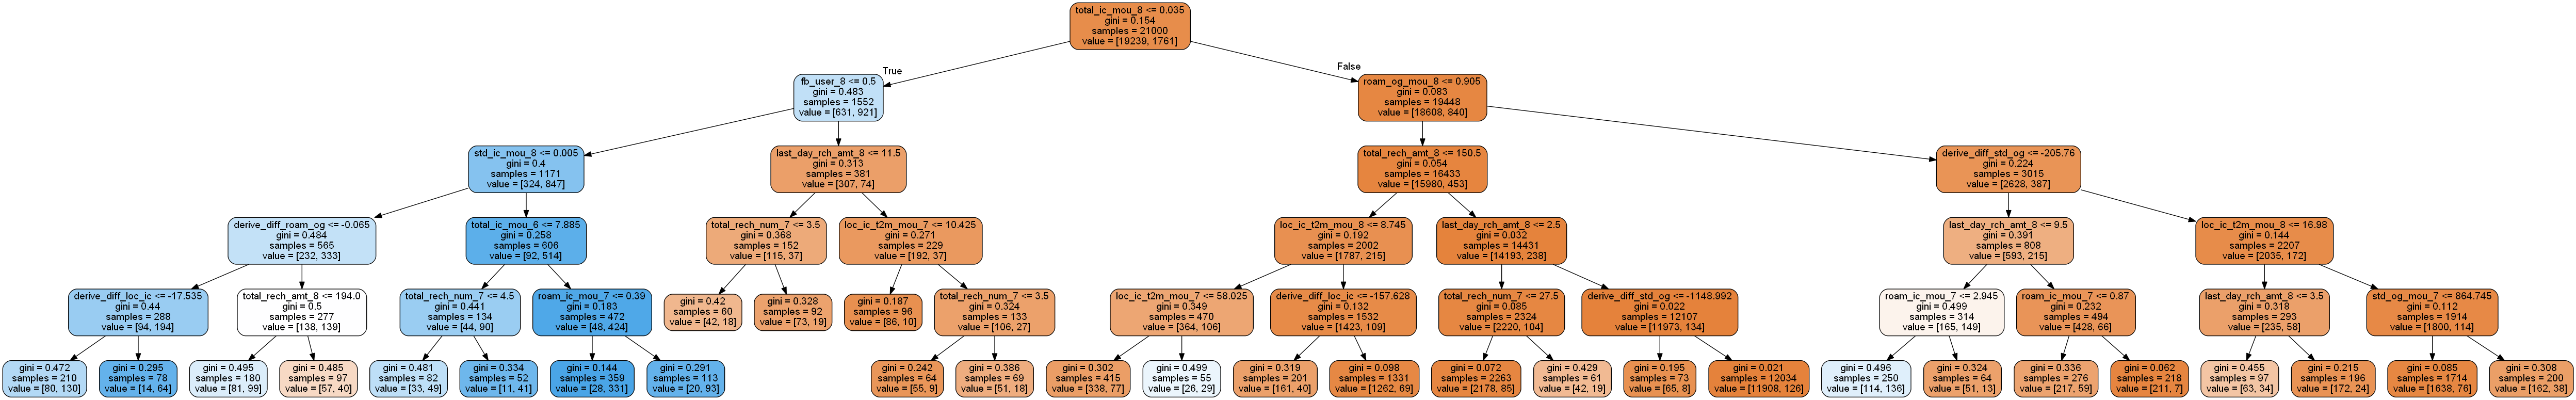

In [114]:
# plotting the tree
# Putting features
features = list(X_train_rfe.columns[0:])
features

dot_data = StringIO()  
export_graphviz(dt_tuned, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Important churn predictors and business recommendation


In [115]:
print("************The list of Important predictors: ***************")
for i in range(0,len(X_train_rfe.columns)):
    print(X_train_rfe.columns[i])



************The list of Important predictors: ***************
roam_ic_mou_7
roam_og_mou_8
std_og_mou_7
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
std_ic_mou_8
total_ic_mou_6
total_ic_mou_8
total_rech_num_7
total_rech_amt_8
last_day_rch_amt_8
fb_user_8
derive_diff_loc_ic
derive_diff_std_og
derive_diff_roam_og


### Recommendation & strategies to manage customer churn based on your observations.

  - #### Business must focus on 3rd month which is Action Phase where customers will show churn behavious
  - #### Incoming Call Volumns, recharge amount should be observed closely and any downwards trend will be predicted as "Churn"
  - #### Any drastic difference in Local, STD & Roaming charges will be flagged as "Churn" behaviour. 
  - #### Customer Management team must be engaged well in advance with the high risk customers who will be predicted as Churn using this model.  
  